Part I (55 points)

1 

Still Image Compression
We will here consider a simple example of a still image compression that
exemplifies the operation of the JPEG image compression standard. Table
1 shows an 8x8 pixels section of a monochrome (grayscale) image. You will
need a computer with Matlab installed for this (or, alternatively, it can be
done by hand - but that may take a while).

a) Apply the 2-dimensional DCT (Discrete Cosine Transform) on
the data block. Use the function DCT2 in MATLAB. (10 points)

[[ 1.06387500e+03  6.56530796e+00 -2.24204932e+00  1.22031790e+00
  -3.75000000e-01 -1.08739329e+00  7.93388210e-01  1.13473851e+00]
 [-1.02438801e+02  4.56749149e+00  2.26372588e+00  1.12061110e+00
   3.58148693e-01 -6.33633466e-01 -1.05302724e+00 -4.80185917e-01]
 [ 3.77706166e+01  1.31440734e+00  1.77404852e+00  2.58329695e-01
  -1.50951150e+00 -2.21817548e+00 -1.00951481e-01  2.32881560e-01]
 [-5.67404043e+00  2.24214694e+00 -1.32600744e+00 -8.13211172e-01
   1.41728756e+00  2.21194688e-01 -1.39308310e-01  1.70278151e-01]
 [-3.37500000e+00 -7.45091955e-01 -1.75689591e+00  7.76371149e-01
  -6.25000000e-01 -2.65967417e+00 -1.30175526e+00  7.62049287e-01]
 [ 5.98943278e+00 -1.39948066e-01 -4.59461377e-01 -7.78805312e-01
   1.99935482e+00 -2.65215953e-01  1.46434767e+00  4.71007726e-03]
 [ 3.97325697e+00  5.52797698e+00  2.39904852e+00 -5.58772548e-01
  -5.12349883e-02 -8.47568736e-01 -5.24048519e-01 -1.30130006e-01]
 [-3.43314493e+00  5.19814083e-01 -1.07206540e+00  8.71070333e-01
   

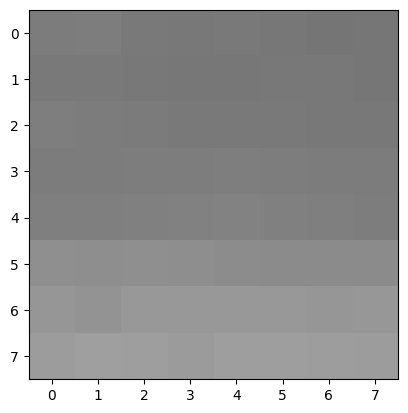

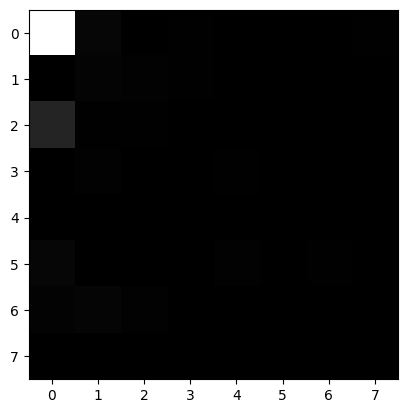

In [36]:
from scipy.fftpack import fft, dct, idct
import numpy as np
import matplotlib.pylab as plt

block = np.array([[124, 125, 122, 120, 122, 119, 117, 118],
                [121, 121, 120, 119, 119, 120, 120, 118],
                [126, 124, 123, 122, 121, 121, 120, 120],
                [124, 124, 125, 125, 126 ,125 ,124 ,124],
                [127, 127, 128, 129, 130, 128, 127, 125],
                [143, 142, 143, 142, 140, 139, 139, 139],
                [150, 148, 152, 152, 152, 152, 150, 151],
                [156, 159, 158, 155, 158, 158, 157, 156]])

quantization_table = np.array([[16, 11, 10, 16, 24, 40, 51, 61], 
                               [12, 12, 14, 19, 26, 58, 60, 55], 
                               [14, 13, 16, 24, 40, 57, 69, 56], 
                               [14, 17, 22, 29, 51, 87, 80, 62], 
                               [18, 22, 37, 56, 68, 109, 103, 77], 
                               [24, 35, 55, 64, 81, 104, 113, 92], 
                               [49, 64, 78, 87, 103, 121, 120, 101], 
                               [72, 92, 95, 98, 112, 100, 103, 99]])

def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')  

block_dct = dct2(block)
block_idct = idct2(block_dct)

print(block_dct)
# plot block as image
plt.imshow(block, cmap='gray', vmin=0, vmax=255)
plt.show()
# plot block_dct as image
plt.imshow(block_dct, cmap='gray', vmin=0, vmax=255)
plt.show()


b) 

Find the coefficients kij . What do we gain by encoding/quantizing
the image in the transform domain rather than encoding/quantizing
the original image pixels directly? (10 points)


[[66.  1.  0.  0.  0.  0.  0.  0.]
 [-9.  0.  0.  0.  0.  0.  0.  0.]
 [ 3.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


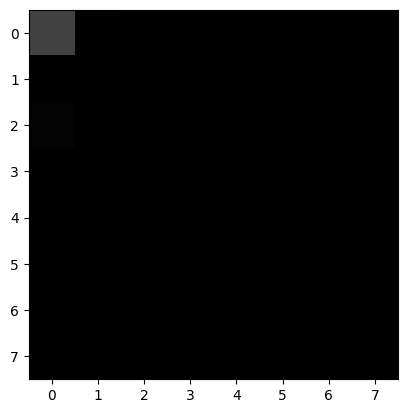

In [37]:
import math
quantized = np.zeros((8,8))

for i in range(8):
    for j in range(8):
        quantized[i,j] = math.floor(block_dct[i,j]/quantization_table[i,j]+0.5)

print(quantized)
# plot transform_coefficients as image
plt.imshow(quantized, cmap='gray', vmin=0, vmax=255)
plt.show()

We see that the dct coefficients after performing the quantizatino contains alot of zeros, which makes it good for compressing using run length coding. The zeros can be encoded as the amount of zeros in succession instead of storing each zero value. the high frequency components were already close to zero, but after performing the quantization they all became zero.

c) 

Perform the reconstruction of the quantized transform coefficients by using the Matlab command IDCT2 and find the PSNR
(Peak Signal-to-Noise Ratio) for the 8x8 block (Remember to
dequantize the quantized transform coefficients before applying
IDCT2). (10 points)

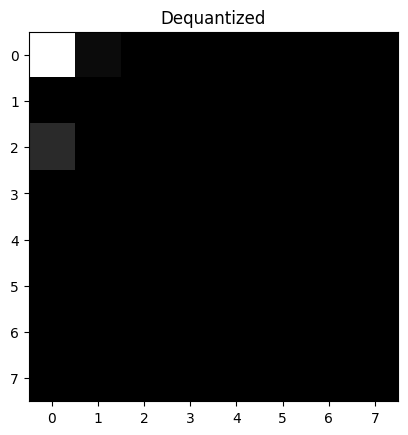

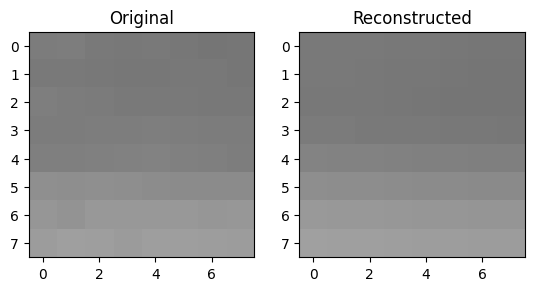

In [47]:
dequantized = np.zeros((8,8))
# dequantize
for i in range(8):
    for j in range(8):
        dequantized[i,j] = (quantized[i,j])*quantization_table[i,j]
# inverse dct
block_idct = idct2(dequantized)

plt.title('Dequantized')
plt.imshow(dequantized, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(block, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.title('Reconstructed')
plt.imshow(block_idct, cmap='gray', vmin=0, vmax=255)
plt.show()

## 3 Compression Basics

### a)

What are the fundamental steps for lossless and lossy multimedia
compression, respectively? (5 points)


#### Lossy encoding
The fundamental steps for lossless multimedia compression are predictive coding, transform coding, entropy coding, and decoding. Predictive coding predicts values of multimedia data using neighboring values, transforming the data to a frequency domain, and quantizing and encoding the transformed data using entropy coding. Decoding reverses the process to reconstruct the original data.

#### Lossless encoding
Lossless encoding using the DCT is difficult to specify, therefore lossless jpeg encoding does not involve DCT, but only uses a predictive encoder together with an entropy encoder. 

### b) 

What are the principles behind these steps? (5 points)

#### Predictor
 The predictor works by estimating the value of a pixel by looking at the neighboring pixels. This reduces compresses the image by taking advantage of high correlation betwen the pixels.

#### entropy encoding
normally the bit length of a number is determined by the size of the value, where larger numbers require more bit. entropy encoders usually define a new binary represantion for the values in the file that uses fewer bits.

#### Transfrom
The principle behind performing the transform is to perform operations on the frequency spectrum of the image. generally the pixels in images are higly correlated, and so the high frequency components are not very important. The Transform allows us to compress the image at the expense of essentiallly removing the unimportant high frequency components. 

The transoform is usually done on 8x8 pixel blocks in the image as opposed to doing it on the entire image at once.

#### Quantization
Quantization puts similar pixel values in fixed ranges, which most importantly is responsible for removing the unimportant high frequency components.

The way this is done is by dividing the transform coefficients by values found in a quantization table, and rounding to the nearest integer. The quantization table used allows us to specify the ratio between compression and quality.


### c) 

What are the most used algorithms in each step? (5 points)

The most used predictor is the left encoder, which predicts the value pixel by using the value of the pixel to its left.

The most used Transform is the DCT(Discrete Cosine Transform) which calculated the frequency spectrum of the image. The DCT is preferred over the fourier transform because it is more computationally efficient, and makes it easier to remove high frequency components

The most used quantization table is the JPEG standard quantization matrix, which was created from visual perception studies, and is designed to allocate fewer bits to frequencies that are less perceptible to the human eye. generally it has lower values for low frequencies and higher values for high frequency to reduce the accuracy of high frequencies.

The most used entropy encoder is huffman coding. The huffman coding works by allocating fewer bits to values that appear more often, while using more bits for values that are less common. 



### d) 

If it is lossy compression, how do we evaluate the compression
quality? (5 points)


Evualting the quality for lossy compression can be challenging as quality can be very subjective. an objective approach could be to calculate the signal to noise ratio, but this might not represent what humans think. A way to find this out is to ask different peolpe which of multiple images they prefer, but people will most lkely disagree on some accounts. 

A combination of both methods is probably the best approach.